In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

traffic_data = pd.read_csv('Annual_Average_Daily_Traffic_Volume_Counts_20241008.csv')
traffic_data.head()

,Local ID,County,Municipality,On,From,To,Approach,Direction,AADT Year,AADT,AADT Cars,AADT Trucks,Location
0,530185,Erie,Tonawanda,MAIN ST,TONAWANDA CITY LN,FLETCHER ST,BETWEEN,2-WAY,1991.0,10600.0,NaN,NaN,"(43.013563, -78.879433)"
1,530201,Erie,Aurora,DAVIS RD,BEHM RD,MILL RD,BETWEEN,2-WAY,2008.0,2600.0,NaN,NaN,"(42.707889, -78.681743)"
2,530290,Erie,Cheektowaga,UNION RD,FRENCH RD,LOSSON RD,BETWEEN,2-WAY,1981.0,24300.0,NaN,NaN,"(42.875084, -78.753519)"
3,530357,Erie,Amherst,LOCKPORT EXPWY,I-290,UB ACCESS,BETWEEN,2-WAY,1984.0,21500.0,NaN,NaN,"(43.001819, -78.803451)"
4,530442,Erie,Hamburg,CAMP RD,LEGION DR,I-90,BETWEEN,2-WAY,1982.0,15100.0,NaN,NaN,"(42.735571, -78.84068)"


In [19]:
traffic_data.describe()

,AADT Year,AADT,AADT Cars,AADT Trucks
count,24753.000000,24753.000000,4593.000000,4593.000000
mean,2001.812952,9864.022058,4848.173525,319.534074
std,12.918323,13553.168896,4929.721732,496.632735
min,1971.000000,13.000000,29.000000,0.000000
25%,1992.000000,2800.000000,1869.000000,77.000000
50%,2005.000000,6100.000000,3639.000000,168.000000
75%,2012.000000,11600.000000,6491.000000,357.000000
max,2023.000000,149900.000000,83546.000000,6426.000000


In [21]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24788 entries, 0 to 24787
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Local ID      24788 non-null  object 
 1   County        24788 non-null  object 
 2   Municipality  24788 non-null  object 
 3   On            24788 non-null  object 
 4   From          23916 non-null  object 
 5   To            23916 non-null  object 
 6   Approach      8440 non-null   object 
 7   Direction     23733 non-null  object 
 8   AADT Year     24753 non-null  float64
 9   AADT          24753 non-null  float64
 10  AADT Cars     4593 non-null   float64
 11  AADT Trucks   4593 non-null   float64
 12  Location      24784 non-null  object 
dtypes: float64(4), object(9)
memory usage: 2.5+ MB


In [23]:
traffic_data.isnull().sum()

Local ID            0
County              0
Municipality        0
On                  0
From              872
To                872
Approach        16348
Direction        1055
AADT Year          35
AADT               35
AADT Cars       20195
AADT Trucks     20195
Location            4
dtype: int64

In [27]:
def data_case_insensitive(data_case_sensitive):
    for column in data_case_sensitive.columns:
        if data_case_sensitive[column].dtype == 'object': 
            data_case_sensitive[column] = data_case_sensitive[column].str.lower()
    return data_case_sensitive 

traffic_data = data_case_insensitive(traffic_data) 
traffic_data.head()

,Local ID,County,Municipality,On,From,To,Approach,Direction,AADT Year,AADT,AADT Cars,AADT Trucks,Location
0,530185,erie,tonawanda,main st,tonawanda city ln,fletcher st,between,2-way,1991.0,10600.0,NaN,NaN,"(43.013563, -78.879433)"
1,530201,erie,aurora,davis rd,behm rd,mill rd,between,2-way,2008.0,2600.0,NaN,NaN,"(42.707889, -78.681743)"
2,530290,erie,cheektowaga,union rd,french rd,losson rd,between,2-way,1981.0,24300.0,NaN,NaN,"(42.875084, -78.753519)"
3,530357,erie,amherst,lockport expwy,i-290,ub access,between,2-way,1984.0,21500.0,NaN,NaN,"(43.001819, -78.803451)"
4,530442,erie,hamburg,camp rd,legion dr,i-90,between,2-way,1982.0,15100.0,NaN,NaN,"(42.735571, -78.84068)"


In [29]:
traffic_data['High_Traffic'] = traffic_data['AADT'].apply(lambda x: 1 if x > 10000 else 0)
traffic_data.head(), traffic_data.shape

(  Local ID County Municipality              On               From  \
 0   530185   erie    tonawanda         main st  tonawanda city ln   
 1   530201   erie       aurora        davis rd            behm rd   
 2   530290   erie  cheektowaga        union rd          french rd   
 3   530357   erie      amherst  lockport expwy              i-290   
 4   530442   erie      hamburg         camp rd          legion dr   
 
             To Approach Direction  AADT Year     AADT  AADT Cars  AADT Trucks  \
 0  fletcher st  between     2-way     1991.0  10600.0        NaN          NaN   
 1      mill rd  between     2-way     2008.0   2600.0        NaN          NaN   
 2    losson rd  between     2-way     1981.0  24300.0        NaN          NaN   
 3    ub access  between     2-way     1984.0  21500.0        NaN          NaN   
 4         i-90  between     2-way     1982.0  15100.0        NaN          NaN   
 
                   Location  High_Traffic  
 0  (43.013563, -78.879433)             

In [31]:

traffic_data = traffic_data.drop(columns=['AADT Cars', 'AADT Trucks'])
traffic_data['AADT'].fillna(traffic_data['AADT'].mean(), inplace=True)
traffic_data['AADT Year'].fillna(traffic_data['AADT Year'].mean(), inplace=True)
traffic_data['Direction'].fillna(traffic_data['Direction'].mode()[0], inplace=True)
traffic_data['Location'].fillna(traffic_data['Location'].mode()[0], inplace=True)

missing_values = traffic_data.isnull().sum()
missing_values


/var/folders/ht/vhh4hxzn1614ncvj77svrnpr0000gn/T/ipykernel_66769/212929571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traffic_data['AADT'].fillna(traffic_data['AADT'].mean(), inplace=True)
/var/folders/ht/vhh4hxzn1614ncvj77svrnpr0000gn/T/ipykernel_66769/212929571.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

Local ID            0
County              0
Municipality        0
On                  0
From              872
To                872
Approach        16348
Direction           0
AADT Year           0
AADT                0
Location            0
High_Traffic        0
dtype: int64

In [33]:
traffic_data.head()

,Local ID,County,Municipality,On,From,To,Approach,Direction,AADT Year,AADT,Location,High_Traffic
0,530185,erie,tonawanda,main st,tonawanda city ln,fletcher st,between,2-way,1991.0,10600.0,"(43.013563, -78.879433)",1
1,530201,erie,aurora,davis rd,behm rd,mill rd,between,2-way,2008.0,2600.0,"(42.707889, -78.681743)",0
2,530290,erie,cheektowaga,union rd,french rd,losson rd,between,2-way,1981.0,24300.0,"(42.875084, -78.753519)",1
3,530357,erie,amherst,lockport expwy,i-290,ub access,between,2-way,1984.0,21500.0,"(43.001819, -78.803451)",1
4,530442,erie,hamburg,camp rd,legion dr,i-90,between,2-way,1982.0,15100.0,"(42.735571, -78.84068)",1


In [35]:
traffic_data.isnull().sum()

Local ID            0
County              0
Municipality        0
On                  0
From              872
To                872
Approach        16348
Direction           0
AADT Year           0
AADT                0
Location            0
High_Traffic        0
dtype: int64

In [37]:
columns_to_drop = ['From', 'To', 'Location','Approach']
traffic_data_cleaned = traffic_data.drop(columns=columns_to_drop)

traffic_data_cleaned.head()


,Local ID,County,Municipality,On,Direction,AADT Year,AADT,High_Traffic
0,530185,erie,tonawanda,main st,2-way,1991.0,10600.0,1
1,530201,erie,aurora,davis rd,2-way,2008.0,2600.0,0
2,530290,erie,cheektowaga,union rd,2-way,1981.0,24300.0,1
3,530357,erie,amherst,lockport expwy,2-way,1984.0,21500.0,1
4,530442,erie,hamburg,camp rd,2-way,1982.0,15100.0,1


In [39]:
columns_to_encode = ['Local ID', 'County', 'Municipality', 'On', 'Direction','AADT Year']
for col in columns_to_encode:
    traffic_data_cleaned[col] = traffic_data_cleaned[col].astype('category').cat.codes

traffic_data_cleaned.head()


,Local ID,County,Municipality,On,Direction,AADT Year,AADT,High_Traffic
0,197,1,74,887,1,20,10600.0,1
1,212,1,6,356,1,38,2600.0,0
2,281,1,14,1468,1,10,24300.0,1
3,340,1,2,855,1,13,21500.0,1
4,404,1,32,223,1,11,15100.0,1


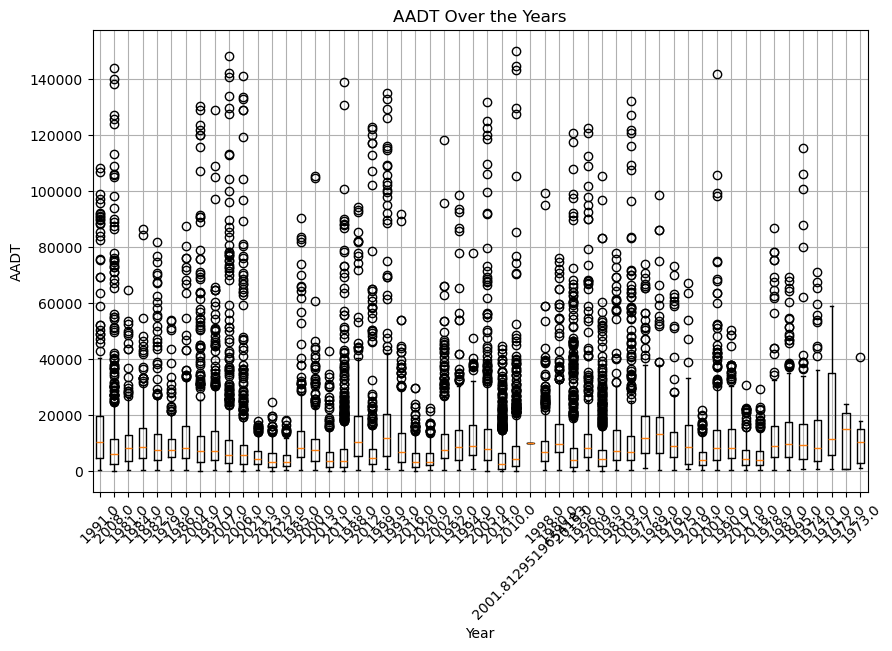

In [41]:
plt.figure(figsize=(10, 6))
plt.boxplot([traffic_data[traffic_data['AADT Year'] == year]['AADT'].dropna() for year in traffic_data['AADT Year'].unique()], labels=traffic_data['AADT Year'].unique())
plt.title('AADT Over the Years')
plt.xlabel('Year')
plt.ylabel('AADT')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



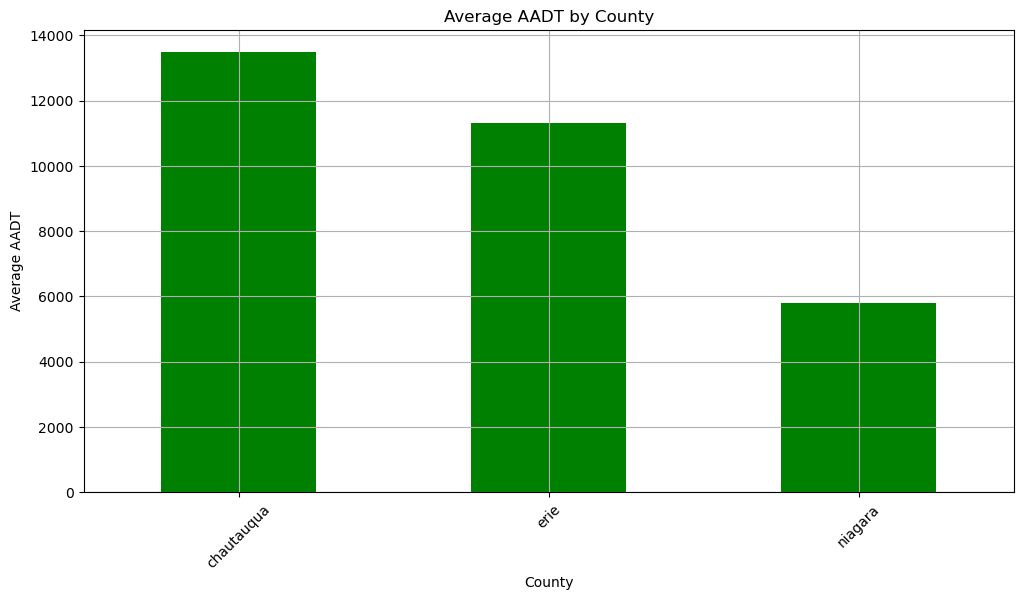

In [43]:
aadts_by_county = traffic_data.groupby('County')['AADT'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
aadts_by_county.plot(kind='bar', color='green')
plt.title('Average AADT by County')
plt.xlabel('County')
plt.ylabel('Average AADT')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

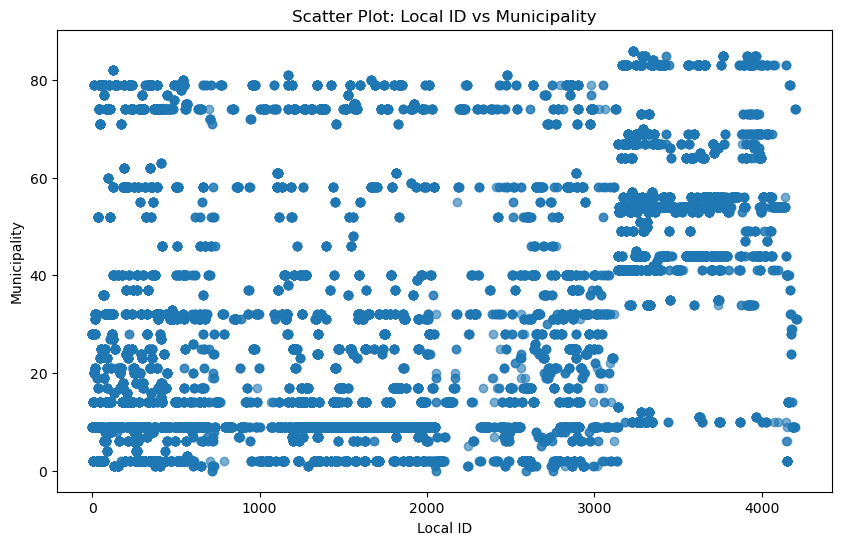

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(traffic_data_cleaned['Local ID'], traffic_data_cleaned['Municipality'], alpha=0.6)
plt.title('Scatter Plot: Local ID vs Municipality')
plt.xlabel('Local ID')
plt.ylabel('Municipality')
plt.show()


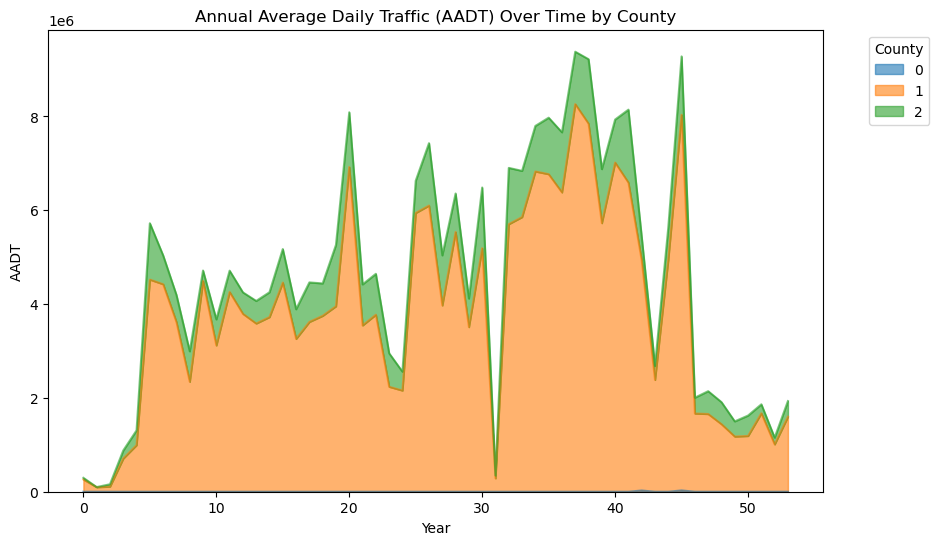

In [47]:
traffic_area_data = traffic_data_cleaned.pivot_table(values='AADT', index='AADT Year', columns='County', aggfunc='sum')

traffic_area_data.plot(kind='area', stacked=True, figsize=(10, 6), alpha=0.6)
plt.title('Annual Average Daily Traffic (AADT) Over Time by County')
plt.xlabel('Year')
plt.ylabel('AADT')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



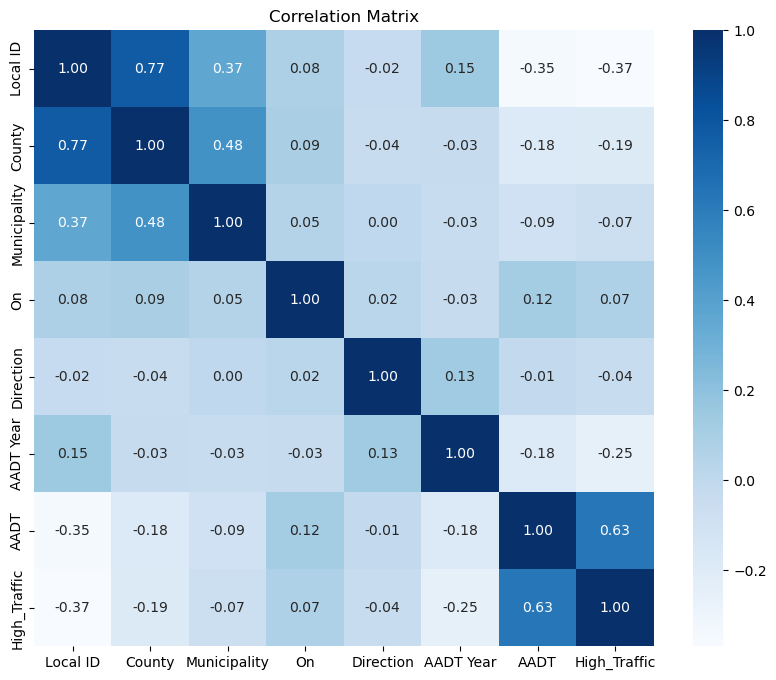

In [49]:
non_numeric_columns = traffic_data_cleaned.select_dtypes(exclude=['int64', 'float64']).columns
traffic_data_numeric = traffic_data_cleaned.drop(columns=non_numeric_columns)
for col in non_numeric_columns:
    traffic_data_cleaned[col] = traffic_data_cleaned[col].astype('category').cat.codes
correlation_matrix = traffic_data_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [51]:
traffic_data_cleaned.head()

,Local ID,County,Municipality,On,Direction,AADT Year,AADT,High_Traffic
0,197,1,74,887,1,20,10600.0,1
1,212,1,6,356,1,38,2600.0,0
2,281,1,14,1468,1,10,24300.0,1
3,340,1,2,855,1,13,21500.0,1
4,404,1,32,223,1,11,15100.0,1


In [53]:
columns_to_normalize = ['Local ID', 'County', 'Municipality', 'On', 'Direction', 'AADT Year','AADT']

for col in columns_to_normalize:
    min_val = traffic_data_cleaned[col].min()
    max_val = traffic_data_cleaned[col].max()
    
    traffic_data_cleaned[col] = (traffic_data_cleaned[col] - min_val) / (max_val - min_val)
    
traffic_data_cleaned.head()


,Local ID,County,Municipality,On,Direction,AADT Year,AADT,High_Traffic
0,0.046804,0.5,0.860465,0.545510,0.166667,0.377358,0.070633,1
1,0.050368,0.5,0.069767,0.218942,0.166667,0.716981,0.017260,0
2,0.066762,0.5,0.162791,0.902829,0.166667,0.188679,0.162035,1
3,0.080779,0.5,0.023256,0.525830,0.166667,0.245283,0.143355,1
4,0.095985,0.5,0.372093,0.137146,0.166667,0.207547,0.100656,1


In [55]:
traffic_data_cleaned.to_csv('Annual_Average_Daily_Traffic_Volume_Counts_20241008_preprossed.csv', index=False)


Hyperparameters set 1: {'learning_rate': 0.01, 'iterations': 10000}
Test Accuracy: 95.34%
Final Training Loss: 0.1436

Hyperparameters set 2: {'learning_rate': 0.001, 'iterations': 100000}
Test Accuracy: 95.34%
Final Training Loss: 0.1417

Hyperparameters set 3: {'learning_rate': 0.005, 'iterations': 50000}
Test Accuracy: 97.20%
Final Training Loss: 0.1015

Hyperparameters set 4: {'learning_rate': 0.005, 'iterations': 100000}
Test Accuracy: 98.16%
Final Training Loss: 0.0779


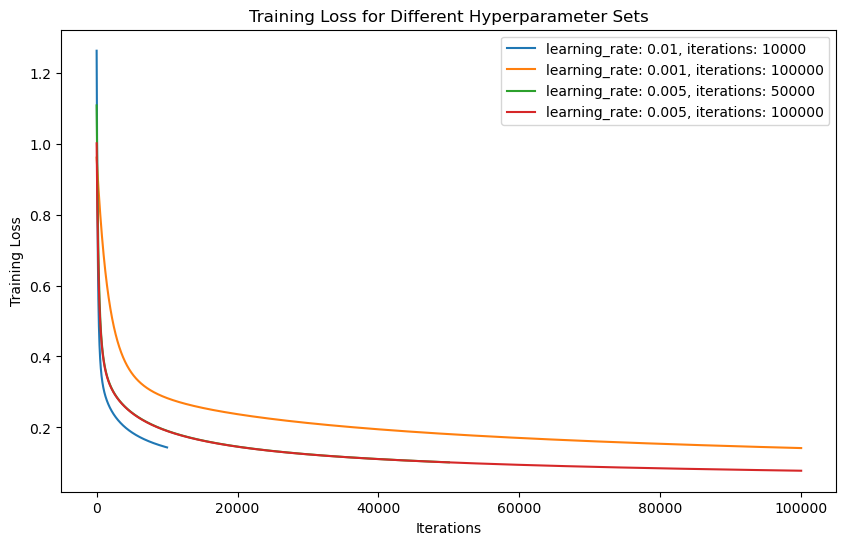


Best Hyperparameters: {'learning_rate': 0.005, 'iterations': 100000}
Best Loss: 0.0779
Best Weights and Bias saved to 'best_model.pkl'.


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pickle  # Import pickle to save the model

# Define the features and target variable for logistic regression
X = traffic_data_cleaned.drop(columns=['High_Traffic'])
y = traffic_data_cleaned['High_Traffic']

# Normalize the features to ensure consistent performance
X = (X - X.mean()) / X.std()

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Custom Logistic Regression class with sigmoid clamping to avoid overflow
class LogitRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.loss = []

    def sigmoid(self, z):
        # Clamp values to avoid overflow in exp
        z = np.clip(z, -500, 500)  # Clamping z to avoid extreme values
        return 1 / (1 + np.exp(-z))

    def cost(self, h, y):
        N = y.shape[0]
        epsilon = 1e-10
        return (-1 / N) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

    def gradient_descent(self, X, y):
        N, num_features = X.shape
        self.weights = np.random.uniform(0, 1, num_features)
        self.bias = 0
        
        self.lossplot = []
        for i in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)
            delta = h - y
            dw = (1 / N) * np.dot(X.T, delta)
            db = (1 / N) * np.sum(delta)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            loss = self.cost(h, y)
            self.loss.append(loss)
            self.lossplot.append(loss)

    def fit(self, X, y):
        self.gradient_descent(X, y)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        h = self.sigmoid(z)
        return np.where(h >= 0.5, 1, 0)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred) * 100

# Task: Training and testing the model
hyperparams = [
    {"learning_rate": 1e-2, "iterations": 10000},
    {"learning_rate": 1e-3, "iterations": 100000},
    {"learning_rate": 5e-3, "iterations": 50000},
    {"learning_rate": 5e-3, "iterations": 100000},
]

plt.figure(figsize=(10, 6))  # Set up the plot

# Initialize variables to store the best hyperparameters, weights, and loss
best_loss = float('inf')
best_weights = None
best_bias = None
best_params = None

for idx, params in enumerate(hyperparams):
    print(f"\nHyperparameters set {idx + 1}: {params}")
    model = LogitRegression(learning_rate=params["learning_rate"], num_iterations=params["iterations"])
    
    # Convert to NumPy arrays for training
    model.fit(X_train.values, y_train.values)
    
    # Predictions
    y_pred_train = model.predict(X_train.values)
    y_pred_test = model.predict(X_test.values)
    
    # Calculate accuracy
    test_accuracy = model.accuracy(y_test.values, y_pred_test)
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Final Training Loss: {model.loss[-1]:.4f}")
    
    # Check if the current model has the lowest loss
    if model.loss[-1] < best_loss:
        best_loss = model.loss[-1]
        best_weights = model.weights.copy()
        best_bias = model.bias
        best_params = params  # Store the hyperparameters of the best model
    
    # Plot the loss
    plt.plot(model.loss, label=f'learning_rate: {params["learning_rate"]}, iterations: {params["iterations"]}')

# Final plot settings
plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.title("Training Loss for Different Hyperparameter Sets")
plt.legend()
plt.show()

# Save the best weights, bias, and hyperparameters to a pickle file
model_data = {
    'weights': best_weights,
    'bias': best_bias,
    'params': best_params,
    'loss': best_loss
}

with open('npulla2_bgutha_assignment1_bonus.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print(f"\nBest Hyperparameters: {best_params}")
print(f"Best Loss: {best_loss:.4f}")
print(f"Best Weights and Bias saved to 'best_model.pkl'.")
